## K - Nearest Neighbour Classification (using SKLearn)

### 0. Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Dataset

In [2]:
iris = pd.read_excel("C:\\Users\\moran\\Desktop\\Datasets\\iris.xlsx")

In [3]:
iris.shape

(150, 5)

In [4]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
np.unique(iris.Species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
#Remove all observations where species is "setosa"
iris = iris.loc[iris.Species!="setosa",]

### 2. Separating the Predictor and the Target

In [7]:
iris.shape

(100, 5)

In [10]:
#Predictors
X = iris.drop(['Species'], axis=1)

In [11]:
#Target
y = iris.Species

### 3. Train-Test Split

In [12]:
#Function test-train split
from sklearn.model_selection import train_test_split

In [13]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, stratify=y)

### 4. Standardization

In [14]:
X_scaled_train = X_train.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [15]:
X_scaled_test = X_test.apply(lambda x: (x - np.mean(x)) / np.std(x))

### 5.  KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') #5NN

# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

### 6. Prediction

In [27]:
predicted_value = knn.predict(X_test)

In [28]:
predicted_value

array(['virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica'], dtype=object)

### 7. Confusion Matrix

In [29]:
# function to create a confusion matrix
from sklearn.metrics import confusion_matrix

c = confusion_matrix(y_test,predicted_value)
c

array([[15,  0],
       [ 1, 14]], dtype=int64)

### 8. Accuracy Checks

In [30]:
#Overall accuracy
(c[0,0]+c[1,1])/np.sum(c)

0.9666666666666667

In [31]:
((c[1,1])/(c[1,1]+c[0,1]))

1.0

### 9. Allternate Approach using Cross-Validation

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
#Using Cross-Validation to choose optimal k
neighbors = list(range(1,51))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [34]:
import matplotlib.pyplot as plt

In [35]:
# changing to misclassification error (1 - accuracy)
Error = [1 - x for x in cv_scores]

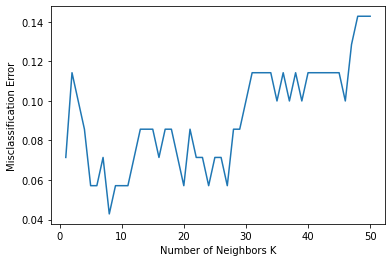

In [36]:
# plot misclassification error vs k
plt.plot(neighbors, Error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

        K = 3, 5

### 10. Final Testing

In [39]:
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean') #5NN

# fitting the model
knn.fit(X_train, y_train)

#Prediction
predicted_values = knn.predict(X_test)

#confusion matrix
c = confusion_matrix(y_test, predicted_values)

#Overall accuracy
(c[0,0]+c[1,1])/np.sum(c)

0.9333333333333333

In [40]:
((c[1,1])/(c[1,1]+c[0,1]))

1.0